In [25]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os

In [26]:
# --- Load and prepare data ---
def load_data():
    df = pd.read_csv("hospitality-ai-platform/data/fnb_sales.csv", parse_dates=["date"])
    df_grouped = df.groupby("date")["sales_amount"].sum().reset_index()
    df_grouped.columns = ["ds", "y"]
    return df_grouped



In [27]:
df=load_data()
df.head()

,ds,y
0,2022-01-01,4164.65
1,2022-01-02,3214.49
2,2022-01-03,3342.37
3,2022-01-04,3662.48
4,2022-01-05,3897.82


In [28]:
# --- Train model ---
def train_model(df):
    model = Prophet(weekly_seasonality=True)
    model.fit(df)
    return model



In [29]:
model=train_model(df)

23:58:47 - cmdstanpy - INFO - Chain [1] start processing
23:58:47 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# --- Forecast future ---
def forecast_sales(model, periods=90):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

In [31]:
forecast=forecast_sales(model, periods=90)

In [32]:
# --- Plot forecast ---
def plot_forecast(model, forecast):
    fig = model.plot(forecast)
    plt.title("F&B Sales Forecast")
    plt.tight_layout()
    os.makedirs("outputs", exist_ok=True)
    plt.savefig("outputs/fnb_sales_forecast.png")
    plt.show()



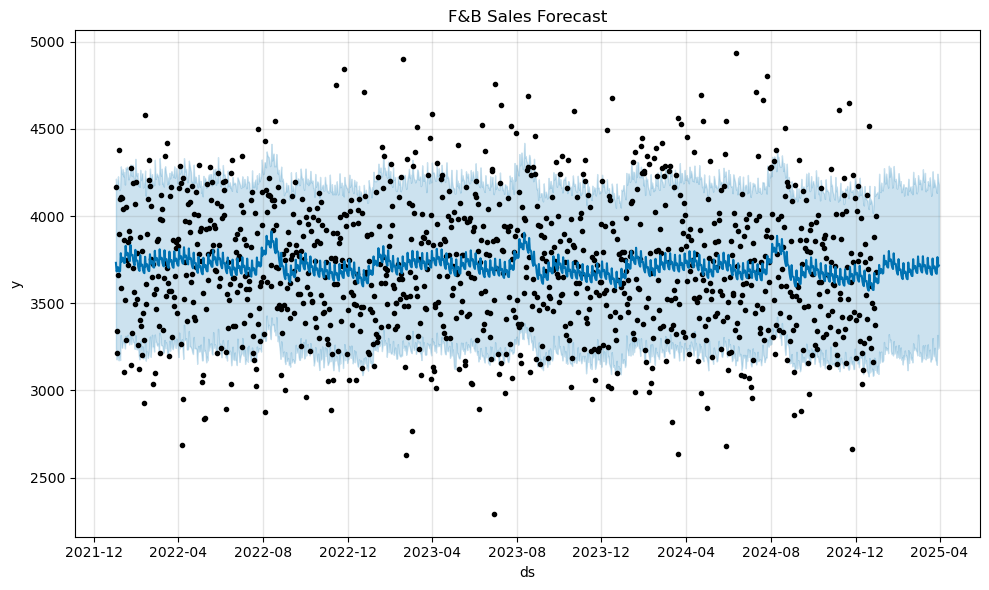

In [33]:
results=plot_forecast(model, forecast)

In [34]:
# --- Save forecast ---
def save_forecast(forecast):
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("outputs/fnb_sales_forecast.csv", index=False)



In [35]:
forecast=save_forecast(forecast)

In [36]:
def main():
    df = load_data()
    model = train_model(df)
    forecast = forecast_sales(model)
    plot_forecast(model, forecast)
    save_forecast(forecast)
    print("✅ F&B Sales Forecast complete.")



23:58:49 - cmdstanpy - INFO - Chain [1] start processing
23:58:49 - cmdstanpy - INFO - Chain [1] done processing


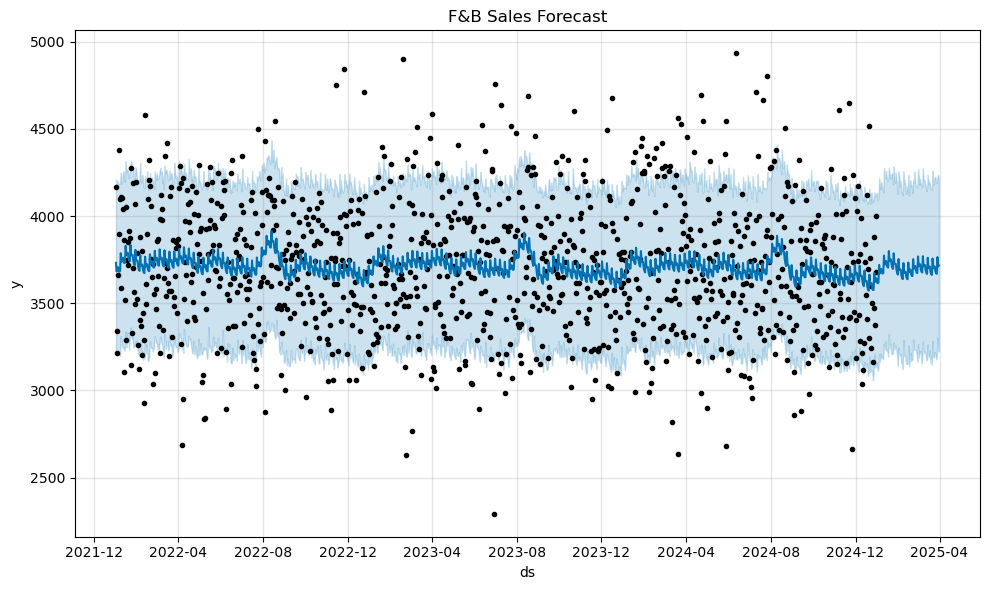

✅ F&B Sales Forecast complete.


In [37]:
if __name__ == "__main__":
    main()
